In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [57]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [58]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [59]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [60]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [61]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [62]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [63]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [64]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
sel = [Measurement.date,
       (Measurement.prcp)]

PrevYearData = session.query(*sel).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

PrevYearData




[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

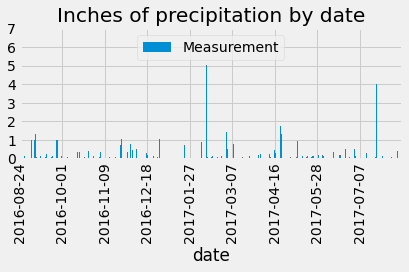

In [66]:
df = pd.DataFrame(PrevYearData, columns=['date', 'Measurement'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.title("Inches of precipitation by date")
plt.tight_layout()
plt.locator_params(axis='x', nbins=9)
plt.locator_params(axis='y', nbins=8)
plt.show()

In [75]:
# Use Pandas to calcualte the summary statistics for the precipitation data
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Station Analysis

In [77]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()


9

In [87]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])
    
select = [Station.id,
       (Station.station), (Station.name), (Station.latitude), (Station.longitude), (Station.elevation)]

stationList = session.query(*select).\
    order_by(Station.id).all()

stationList

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [89]:
selected = [Measurement.station,
       (Measurement.tobs)]

ListTobs = session.query(*selected).\
    order_by(Measurement.station).all()

ListTobs

[('USC00511918', 66.0),
 ('USC00511918', 70.0),
 ('USC00511918', 75.0),
 ('USC00511918', 75.0),
 ('USC00511918', 75.0),
 ('USC00511918', 72.0),
 ('USC00511918', 70.0),
 ('USC00511918', 63.0),
 ('USC00511918', 68.0),
 ('USC00511918', 74.0),
 ('USC00511918', 64.0),
 ('USC00511918', 57.0),
 ('USC00511918', 57.0),
 ('USC00511918', 65.0),
 ('USC00511918', 56.0),
 ('USC00511918', 66.0),
 ('USC00511918', 73.0),
 ('USC00511918', 61.0),
 ('USC00511918', 66.0),
 ('USC00511918', 68.0),
 ('USC00511918', 60.0),
 ('USC00511918', 78.0),
 ('USC00511918', 71.0),
 ('USC00511918', 68.0),
 ('USC00511918', 76.0),
 ('USC00511918', 69.0),
 ('USC00511918', 65.0),
 ('USC00511918', 77.0),
 ('USC00511918', 71.0),
 ('USC00511918', 64.0),
 ('USC00511918', 65.0),
 ('USC00511918', 64.0),
 ('USC00511918', 64.0),
 ('USC00511918', 63.0),
 ('USC00511918', 67.0),
 ('USC00511918', 60.0),
 ('USC00511918', 61.0),
 ('USC00511918', 60.0),
 ('USC00511918', 70.0),
 ('USC00511918', 68.0),
 ('USC00511918', 67.0),
 ('USC00511918',

In [92]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

USC00519397 = 0
USC00513117 = 0
USC00514830 = 0
USC00517948 = 0
USC00518838 = 0
USC00519523 = 0
USC00519281 = 0
USC00511918 = 0
USC00516128 = 0


for station in ListTobs:
    if(station.station == 'USC00519397'):
        USC00519397 = USC00519397 + 1
    if(station.station == 'USC00513117'):
        USC00513117 = USC00513117 + 1
    if(station.station == 'USC00514830'):
        USC00514830 = USC00514830 + 1
    if(station.station == 'USC00517948'):
        USC00517948 = USC00517948 + 1
    if(station.station == 'USC00518838'):
        USC00518838 = USC00518838 + 1
    if(station.station == 'USC00519523'):
        USC00519523 = USC00519523 + 1
    if(station.station == 'USC00519281'):
        USC00519281 = USC00519281 + 1
    if(station.station == 'USC00511918'):
        USC00511918 = USC00511918 + 1
    if(station.station == 'USC00516128'):
        USC00516128 = USC00516128 + 1
        
print('USC00519397 = '+ str(USC00519397))
print('USC00513117 = '+ str(USC00513117))
print('USC00514830 = '+ str(USC00514830))
print('USC00517948 = '+ str(USC00517948))
print('USC00518838 = '+ str(USC00518838))
print('USC00519523 = '+ str(USC00519523))
print('USC00519281 = '+ str(USC00519281))
print('USC00511918 = '+ str(USC00511918))
print('USC00516128 = '+ str(USC00516128))

USC00519397 = 2724
USC00513117 = 2709
USC00514830 = 2202
USC00517948 = 1372
USC00518838 = 511
USC00519523 = 2669
USC00519281 = 2772
USC00511918 = 1979
USC00516128 = 2612


In [95]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
selection = [Measurement.station,
       (Measurement.tobs),
            (Measurement.date)]

ListTobsMostActive = session.query(*selection).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs).all()

ListTobsMostActive

[('USC00519281', 54.0, '2013-01-16'),
 ('USC00519281', 56.0, '2015-01-05'),
 ('USC00519281', 56.0, '2015-02-15'),
 ('USC00519281', 56.0, '2015-03-13'),
 ('USC00519281', 56.0, '2016-02-08'),
 ('USC00519281', 57.0, '2011-01-11'),
 ('USC00519281', 57.0, '2014-03-04'),
 ('USC00519281', 57.0, '2015-03-09'),
 ('USC00519281', 57.0, '2015-03-10'),
 ('USC00519281', 57.0, '2015-03-17'),
 ('USC00519281', 57.0, '2016-02-09'),
 ('USC00519281', 58.0, '2010-12-07'),
 ('USC00519281', 58.0, '2014-01-23'),
 ('USC00519281', 58.0, '2014-01-24'),
 ('USC00519281', 58.0, '2015-01-13'),
 ('USC00519281', 58.0, '2015-02-06'),
 ('USC00519281', 58.0, '2016-02-10'),
 ('USC00519281', 59.0, '2013-01-18'),
 ('USC00519281', 59.0, '2014-12-31'),
 ('USC00519281', 59.0, '2017-02-02'),
 ('USC00519281', 59.0, '2017-02-08'),
 ('USC00519281', 59.0, '2017-02-09'),
 ('USC00519281', 60.0, '2010-01-12'),
 ('USC00519281', 60.0, '2010-01-22'),
 ('USC00519281', 60.0, '2010-12-08'),
 ('USC00519281', 60.0, '2011-01-09'),
 ('USC005192

In [96]:
countRows = 0
sumTemp = 0
lowest = 999
highest = 0

for entry in ListTobsMostActive:
    countRows = countRows + 1
    sumTemp = sumTemp + int(entry.tobs)
    if(entry.tobs > highest ):
        highest = int(entry.tobs)
    if(entry.tobs < lowest ):
        lowest = int(entry.tobs)

    
print('Lowest temp was ' + str(lowest))
print('Highest temp was ' + str(highest))
print('Average was '+str(sumTemp/countRows))

Lowest temp was 54
Highest temp was 85
Average was 71.66378066378067


In [164]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
selectionNew = [(Measurement.tobs)]

ListTobsMostActiveLastYear = session.query(*selectionNew).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()



# Put data in a list, then a dataframe
tempList = []

for entry in ListTobsMostActive:
    tempList.append(int(entry.tobs))
    
tempData = pd.DataFrame(tempList, columns = ['tobs'])


# Create bin bounds
tempBins = [0, 56.5, 59.5, 61.5, 64.5, 67, 69.5, 72, 74.5, 77.5, 79.5, 82.5, 86]


# Create bin labels
temp_labels = ["<56.5", "56.5-59.5", "59.5-61.5", "61.5-64.5", "64.5-67", "67-69.5", "69.5-72", "72-74.5", "74.5-77.5", "77.5-79.5", "79.5-82.5", ">82.5"]  


# Apply the bins to the data
tempData["Tobs"] = pd.cut(tempData["tobs"], tempBins, labels=temp_labels, include_lowest=True)
tempDataBinned = tempData.groupby("Tobs")
tempDataBinned = tempDataBinned[["Tobs"]].count()

tempDataBinned = tempDataBinned.rename(columns={"Tobs": "Temp frequency"})


tempDataBinned = tempDataBinned.reset_index()
tempDataBinned = tempDataBinned.rename(columns={"Tobs": "Temp range"})
tempDataBinned

,Temp range,Temp frequency
0,<56.5,5
1,56.5-59.5,17
2,59.5-61.5,34
3,61.5-64.5,111
4,64.5-67,262
5,67-69.5,336
6,69.5-72,782
7,72-74.5,539
8,74.5-77.5,463
9,77.5-79.5,142


<AxesSubplot:xlabel='Temp range'>

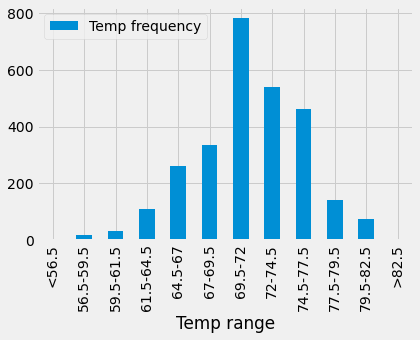

In [165]:
tempDataBinned.plot.bar(x='Temp range', y='Temp frequency')

# Close session

In [166]:
# Close Session
session.close()